# Spotify Training Model on Dataset of 80s
### Loading necessary libraries

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf


In [2]:
df = pd.read_csv("dataset-of-80s.csv")
df.head(10)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Walking Blues,Big Joe Williams,spotify:track:1ZjN5X8LmUB67pWPgimW3B,0.509,0.277,6,-14.323,1,0.0495,0.827000,0.002060,0.0756,0.640,101.157,161893,4,68.46530,7,0
1,Suddenly Last Summer,The Motels,spotify:track:4fLIM0B1WwrLux9RdnMvze,0.716,0.753,2,-5.682,1,0.0286,0.162000,0.030600,0.0831,0.561,120.141,222000,4,57.71583,11,1
2,Sanctuary,Béla Fleck,spotify:track:3DwlNfiCQSdj0GOxYkR9Rq,0.360,0.542,5,-13.885,1,0.0339,0.368000,0.165000,0.1160,0.803,116.831,444907,4,30.34574,17,0
3,The Wild Rover,The Pogues,spotify:track:6JyYNPLalPgGa7XnclF5FO,0.656,0.512,7,-11.872,1,0.0290,0.585000,0.000000,0.0720,0.880,97.500,157893,3,50.97022,7,0
4,In The Driver's Seat,John Schneider,spotify:track:6jJi8OXF5qaFdysB6sjWIT,0.642,0.889,2,-5.620,0,0.0494,0.375000,0.000000,0.1800,0.764,163.351,162293,4,33.62053,7,1
5,Slow Kill,Fields Of The Nephilim,spotify:track:3AKzRH32S4Jc5Ge4RFp5WG,0.296,0.547,4,-15.115,0,0.0327,0.000291,0.013600,0.3720,0.490,148.775,224360,4,53.02555,11,0
6,Young Wild And Free,Brighton Rock,spotify:track:7EBpncUwlHjLhQTetSLb9O,0.454,0.734,2,-15.559,1,0.0410,0.124000,0.000014,0.0990,0.460,135.527,225560,4,36.52688,11,0
7,Holiday,The Other Ones,spotify:track:3f1rbdXIbz36QZ8xU7wt2i,0.487,0.853,11,-10.165,0,0.0343,0.027700,0.007370,0.1360,0.802,83.593,213427,4,15.23401,10,1
8,Answering Machine,Rupert Holmes,spotify:track:5Qo14bQqTK9iGbf2g6JUjL,0.775,0.488,0,-15.044,1,0.1230,0.240000,0.000000,0.0368,0.961,81.158,215200,4,28.65643,9,1
9,Crystal Ball,Yngwie Malmsteen,spotify:track:6C3BPDXuHFRbCWsTk4eNPU,0.406,0.777,8,-11.498,1,0.0590,0.087000,0.000016,0.1960,0.456,131.109,295507,4,41.44096,12,0


In [3]:
df.shape

(6908, 19)

## Shuffling data

In [4]:
df = df.sample(frac=1)

## Dropping categorical features

In [5]:
X = df.drop(["track","artist","uri","target"],axis=1)
X.shape

(6908, 15)

In [6]:
y = df["target"]

## Calculating the number of hit flop songs

In [7]:
hit_flop_count = y.value_counts()
hit_flop_count

1    3454
0    3454
Name: target, dtype: int64

In [8]:
y = y.values

## Scaling inputs

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

## Splitting the data into train test and validation set 

In [10]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(scaled_X,y,test_size=0.1 ,random_state=1)

In [11]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=(1/9), random_state=1)

In [12]:
x_train.shape, x_test.shape, x_val.shape

((5526, 15), (691, 15), (691, 15))

## The Deep learning algorithm 

In [13]:
nn = 200 #hiden layers
target_count = 2

In [14]:
model_80 = tf.keras.Sequential()
model_80.add(tf.keras.layers.Flatten())

model_80.add(tf.keras.layers.Dense(nn, activation=tf.nn.relu))# first hidden  layer
model_80.add(tf.keras.layers.Dense(nn, activation=tf.nn.relu))# second hidden layer
model_80.add(tf.keras.layers.Dense(nn, activation=tf.nn.relu))# third hidden layer

In [15]:
model_80.add(tf.keras.layers.Dense(target_count, activation=tf.nn.softmax))# output layer

In [16]:
model_80.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training model

In [17]:
model_fit = model_80.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), batch_size=100)

Epoch 1/20
56/56 [==============================] - 0s 4ms/step - loss: 0.4926 - accuracy: 0.7544 - val_loss: 0.4576 - val_accuracy: 0.7844
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.4357 - accuracy: 0.7995 - val_loss: 0.4607 - val_accuracy: 0.7887
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.4262 - accuracy: 0.8049 - val_loss: 0.4515 - val_accuracy: 0.7945
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8149 - val_loss: 0.4623 - val_accuracy: 0.7858
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8161 - val_loss: 0.4559 - val_accuracy: 0.7858
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8241 - val_loss: 0.4721 - val_accuracy: 0.7786
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.3863 - accuracy: 0.8243 - val_loss: 0.4527 - val_accuracy: 0.7916
Epoch 8/20
56/56 [==

## Predictions

In [18]:
predictions = model_80.predict(x_test)

## Visualize Neural Network Loss History

### Loss variation plot

In [19]:
training_loss = model_fit.history['loss']
validation_loss = model_fit.history['val_loss']
epoch_count1 = range(1, len(training_loss) + 1)

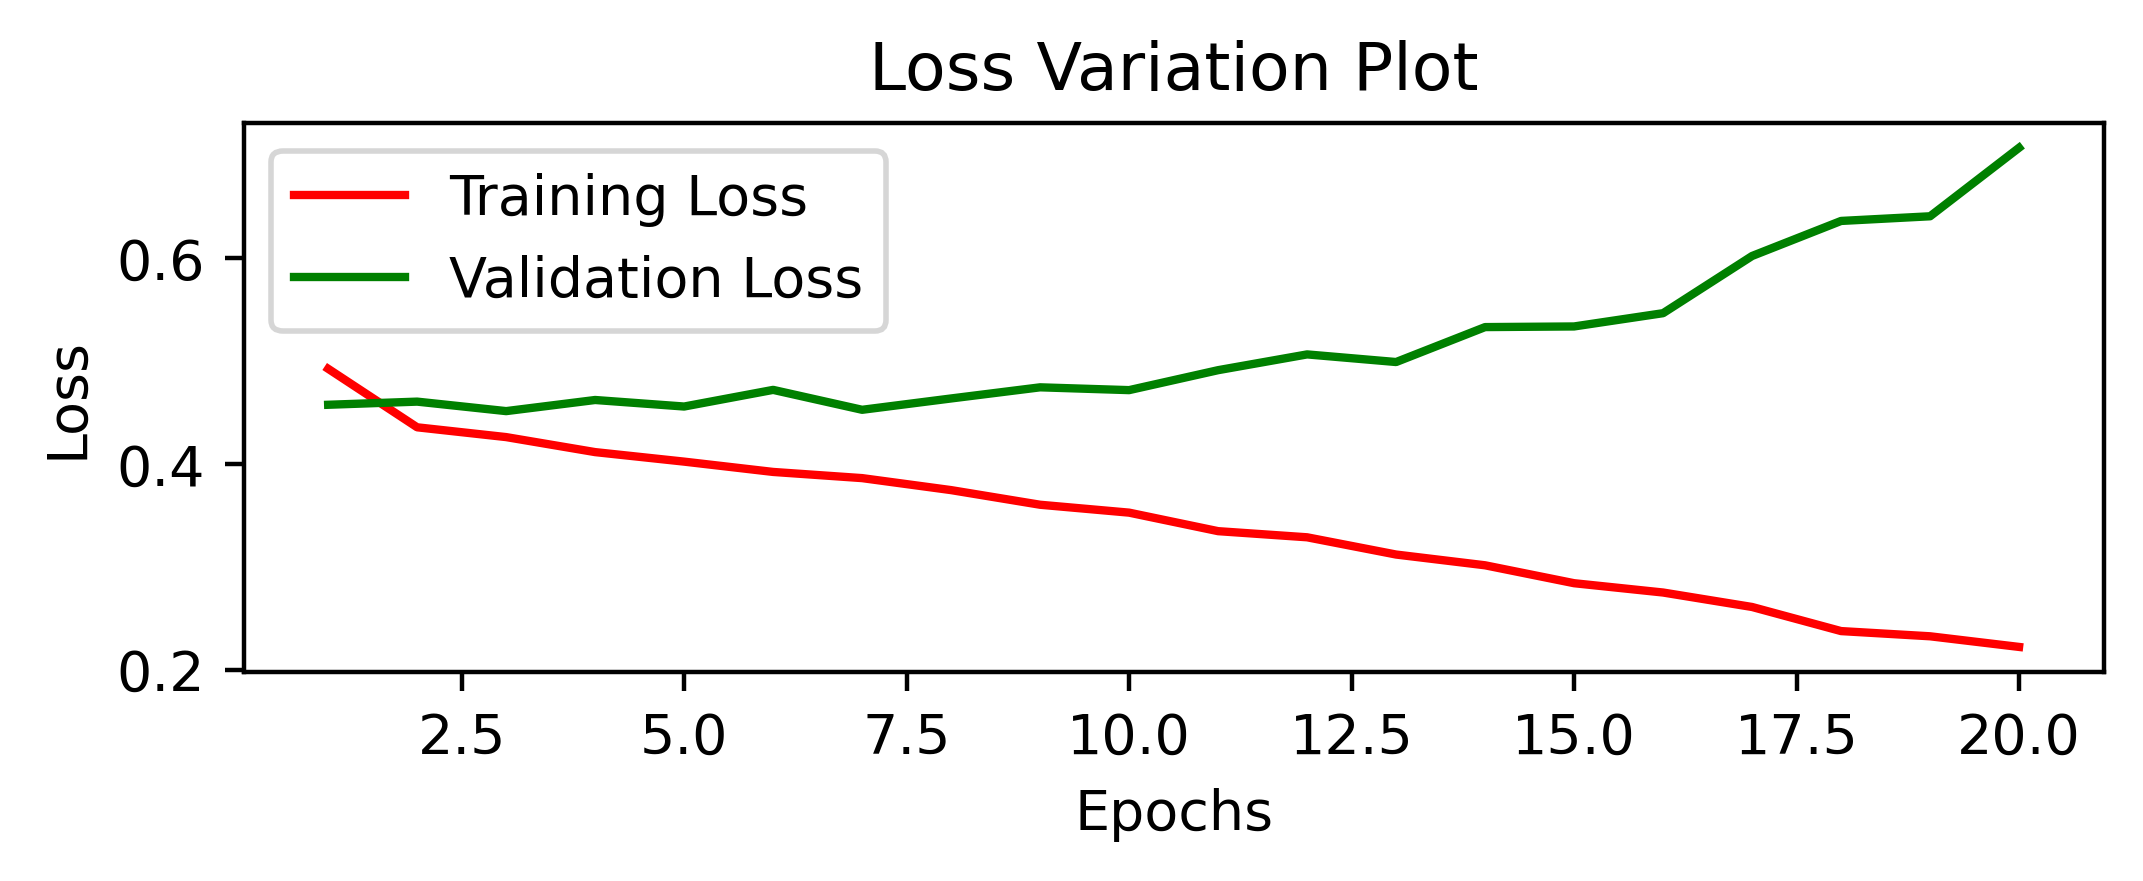

In [20]:
mpl.rcParams['figure.dpi'] = 400
plt.subplot(2,1,2)
plt.title('Loss Variation Plot')
plt.plot(epoch_count1, training_loss, color='red', label='Training Loss')
plt.plot(epoch_count1, validation_loss, color='green', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### Accuracy variation plot

In [21]:
training_acc = model_fit.history['accuracy']
validation_acc = model_fit.history['val_accuracy']
epoch_count2 = range(1, len(training_acc) + 1)

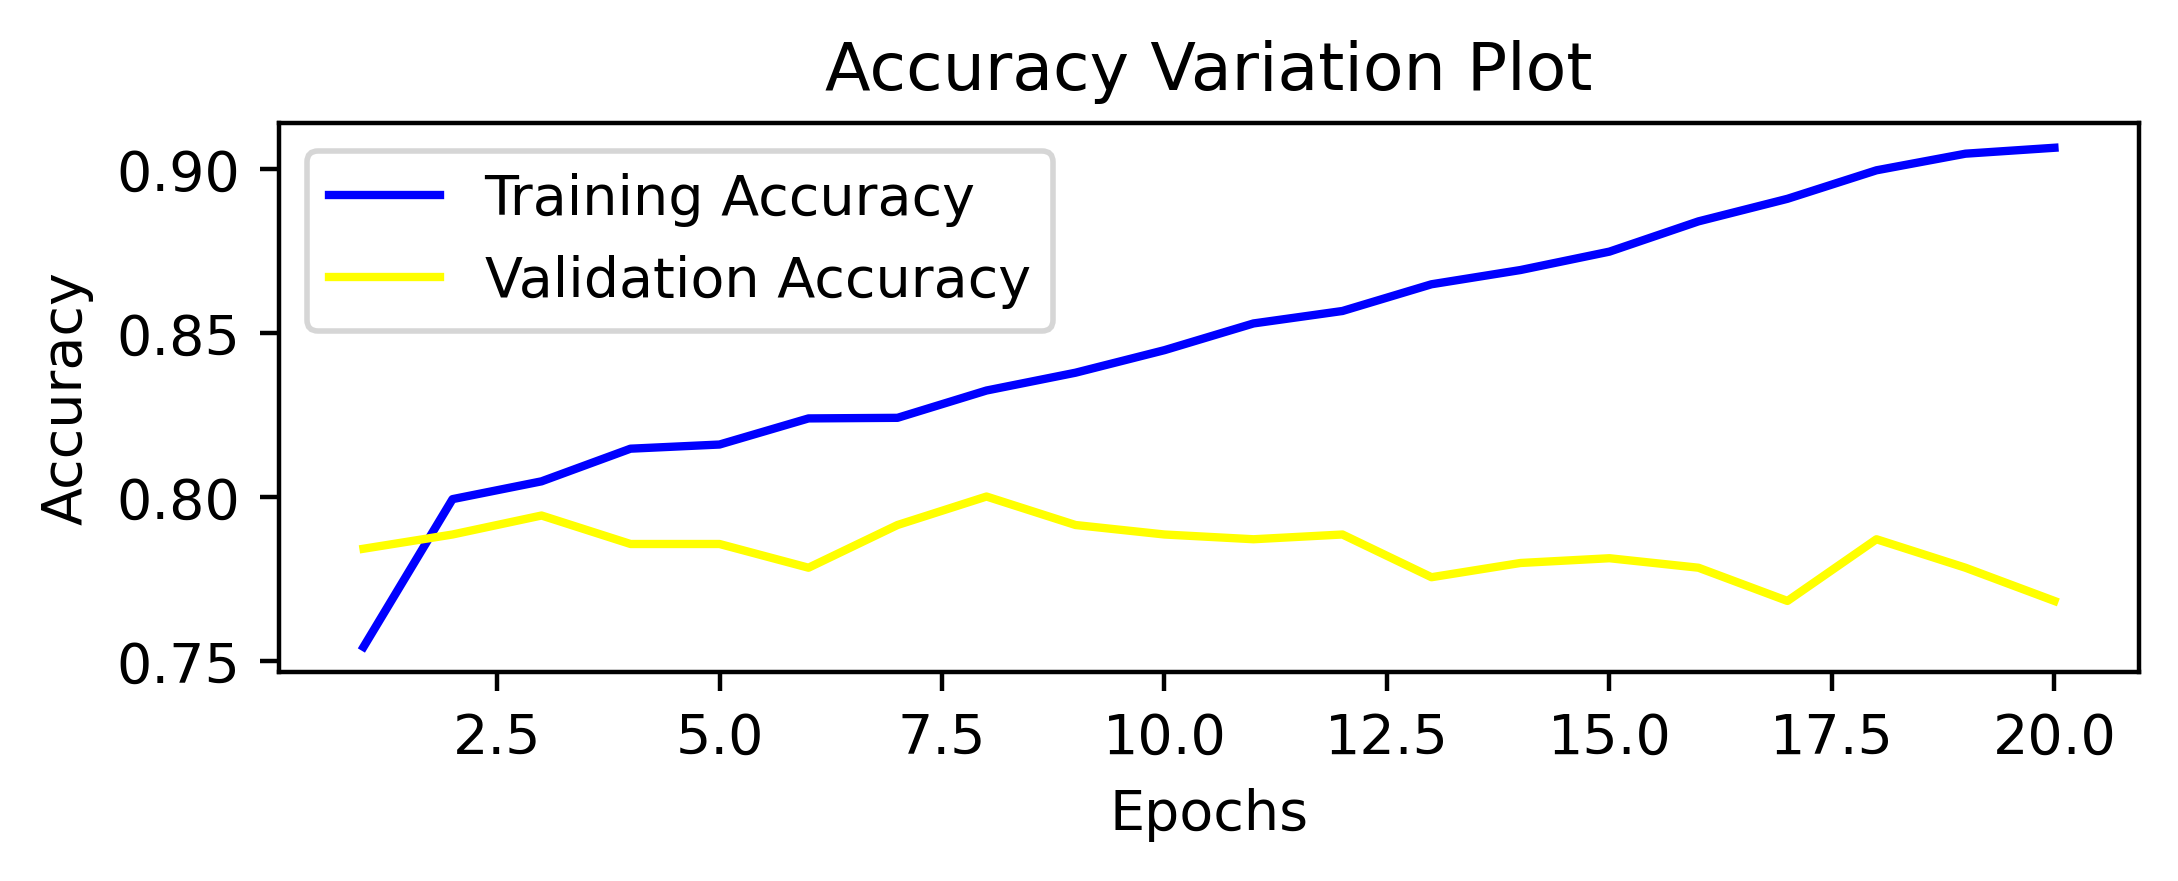

In [22]:
mpl.rcParams['figure.dpi'] = 400
plt.subplot(2,1,2)
plt.title('Accuracy Variation Plot')
plt.plot(epoch_count2, training_acc, color='blue', label='Training Accuracy')
plt.plot(epoch_count2, validation_acc, color='yellow', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Test the model

In [23]:
# Case 1
print(predictions[100])
print('Predicted:', np.argmax(predictions[100]))
print('Original:', y_test[100])

[0.99750745 0.00249256]
Predicted: 0
Original: 0


In [24]:
# case 2
print(predictions[8])
print('Predicted:', np.argmax(predictions[8]))
print('Original:', y_test[8])

[0.06970971 0.9302903 ]
Predicted: 1
Original: 1


## Save and verify model

In [26]:
model_80.save('Trained_model_80')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Trained_model_80\assets


In [27]:
model = tf.keras.models.load_model('Trained_model_80')
print(x_test[1])

[ 1.67988966  0.47320719 -1.45492715  0.32769726  0.67402952 -0.34807415
  0.84486348  0.01435903 -0.64964476  1.41919156 -0.42110612  0.33288974
  0.20673746 -0.39424726  0.38516078]


In [28]:
print(x_test[1].reshape( 1,-1))

[[ 1.67988966  0.47320719 -1.45492715  0.32769726  0.67402952 -0.34807415
   0.84486348  0.01435903 -0.64964476  1.41919156 -0.42110612  0.33288974
   0.20673746 -0.39424726  0.38516078]]


In [29]:
v = model.predict(x_test[1].reshape( 1,-1))
print(v)

[[0.3686303 0.6313697]]


## Evaluating the accuracy of the model

In [31]:
_, training_accuracy = model_80.evaluate(x_train , y_train , verbose = 0)
_ , testing_accuracy = model_80.evaluate(x_test,y_test , verbose = 0)
print(training_accuracy)
print(testing_accuracy)

0.9236337542533875
0.7916063666343689
